# **1 - Import all the Stuff**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA
from numpy import sum, amax
from sklearn.metrics.cluster import contingency_matrix
from sklearn.model_selection import cross_val_score

# **2 - Reading and preparing the dataset**

In [2]:
df = pd.read_csv("sequence/20fps.csv")
df.drop(["id", "inizio", "fine"], axis=1, inplace=True)
dfs = [df[df["classe"] == cls] for cls in range(0,5)]

In [3]:
len_dfs = [len(el) for el in dfs]
len_dfs

[3398, 5751, 1709, 12550, 1126]

In [4]:
dfs_dwn_smpld = [resample(df_cls, replace = False, n_samples = min(len_dfs)) for df_cls in dfs]

In [5]:
len_dfs_dwn_smpld = [len(el) for el in dfs_dwn_smpld]
len_dfs_dwn_smpld

[1126, 1126, 1126, 1126, 1126]

In [6]:
df_downsample = pd.concat([x for x in dfs_dwn_smpld])
len(df_downsample)

5630

In [7]:
df

,classe,min_AU01_r,max_AU01_r,mean_AU01_r,stdev_AU01_r,skew_AU01_r,kurt_AU01_r,min_AU02_r,max_AU02_r,mean_AU02_r,...,mean_AU26_r,stdev_AU26_r,skew_AU26_r,kurt_AU26_r,min_AU45_r,max_AU45_r,mean_AU45_r,stdev_AU45_r,skew_AU45_r,kurt_AU45_r
0,0,0.0,0.00,0.000,0.0000,0.0000,-3.0000,0.0,0.6,0.2750,...,0.3105,0.2231,0.9833,0.1082,0.00,0.00,0.0000,0.0000,0.0000,-3.0000
1,0,0.0,0.00,0.000,0.0000,0.0000,-3.0000,0.0,0.6,0.2750,...,0.2735,0.1976,1.0686,0.7102,0.00,0.00,0.0000,0.0000,0.0000,-3.0000
2,0,0.0,0.12,0.006,0.0268,4.1295,15.0526,0.0,0.6,0.2810,...,0.2350,0.1687,0.8260,0.6541,0.00,0.00,0.0000,0.0000,0.0000,-3.0000
3,0,0.0,0.26,0.019,0.0627,3.2595,9.4456,0.0,0.6,0.2930,...,0.2005,0.1386,0.0976,-1.2583,0.00,0.00,0.0000,0.0000,0.0000,-3.0000
4,0,0.0,0.38,0.038,0.1020,2.5758,5.2996,0.0,0.6,0.3085,...,0.1775,0.1312,0.0501,-1.5379,0.00,0.00,0.0000,0.0000,0.0000,-3.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24529,1,0.0,0.00,0.000,0.0000,0.0000,-3.0000,0.0,0.0,0.0000,...,0.8280,0.2028,-0.6128,0.3380,1.05,1.55,1.2980,0.1904,0.0010,-1.7258
24530,1,0.0,0.00,0.000,0.0000,0.0000,-3.0000,0.0,0.0,0.0000,...,0.8480,0.1666,0.0389,-0.5550,1.05,1.55,1.3165,0.1881,-0.1985,-1.6729
24531,1,0.0,0.00,0.000,0.0000,0.0000,-3.0000,0.0,0.0,0.0000,...,0.8625,0.1450,0.5569,-1.0885,1.05,1.55,1.3330,0.1863,-0.4016,-1.5427
24532,1,0.0,0.00,0.000,0.0000,0.0000,-3.0000,0.0,0.0,0.0000,...,0.8660,0.1422,0.5619,-1.0460,1.05,1.55,1.3445,0.1847,-0.5757,-1.3812


# **3 - Splitting the Dataset**

In [8]:
X = df_downsample.drop("classe", axis=1).copy()
y = df_downsample["classe"].copy()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

# **4 - Training the model**

In [10]:
clf_svm = SVC()
clf_svm.fit(X_train_scaled, y_train)

SVC()

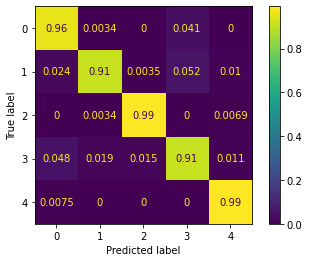

In [11]:
plot_confusion_matrix(clf_svm, X_test_scaled, y_test, normalize = "true")

# **5 - Finding optimal params for the model**

In [12]:
scores = cross_val_score(clf_svm, X, y, cv = 5, scoring = "accuracy")
scores.mean()

0.8850799289520428

In [13]:
from sklearn.metrics import classification_report

p_test = clf_svm.predict(X_test_scaled)

report = classification_report(y_test, p_test)

print(report)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       293
           1       0.97      0.91      0.94       287
           2       0.98      0.99      0.99       291
           3       0.90      0.91      0.90       270
           4       0.97      0.99      0.98       267

    accuracy                           0.95      1408
   macro avg       0.95      0.95      0.95      1408
weighted avg       0.95      0.95      0.95      1408

